In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.style.use('default')
sns.set_palette(["#FF6B6B", "#4ECDC4"])

In [3]:
avg_duration_df = pd.read_csv('../outputs/tables/avg_ride_duration_by_type.csv')
rides_by_day_df = pd.read_csv('../outputs/tables/rides_by_day_of_week.csv')
rides_by_hour_df = pd.read_csv('../outputs/tables/rides_by_hour.csv')
top_casual_stations_df = pd.read_csv('../outputs/tables/top_10_casual_stations.csv')
bike_type_df = pd.read_csv('../outputs/tables/bike_type_preference.csv')

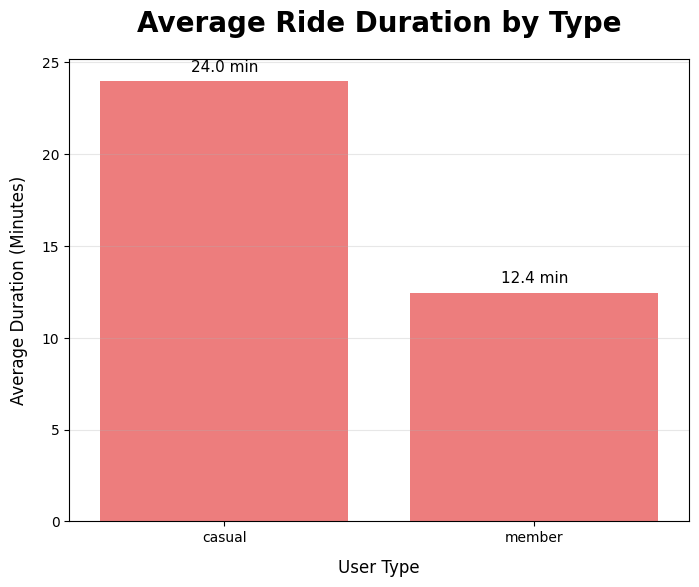

In [4]:
plt.figure(figsize = (8,6))
ax = sns.barplot(data=avg_duration_df, x='user_type', y='avg_ride_length_min', estimator="mean")

plt.title('Average Ride Duration by Type',fontsize=20, fontweight='bold', pad=20)
plt.xlabel('User Type', fontsize=12, labelpad=10)
plt.ylabel('Average Duration (Minutes)', fontsize=12, labelpad=10)
plt.grid(axis='y', alpha=0.3)
for i in ax.containers:
    ax.bar_label(i, fmt='%.1f min', padding=5, fontsize=11)

plt.savefig('../outputs/figures/avg_duration_by_type.png', dpi=300, bbox_inches='tight')
plt.show()


<Figure size 1200x600 with 0 Axes>

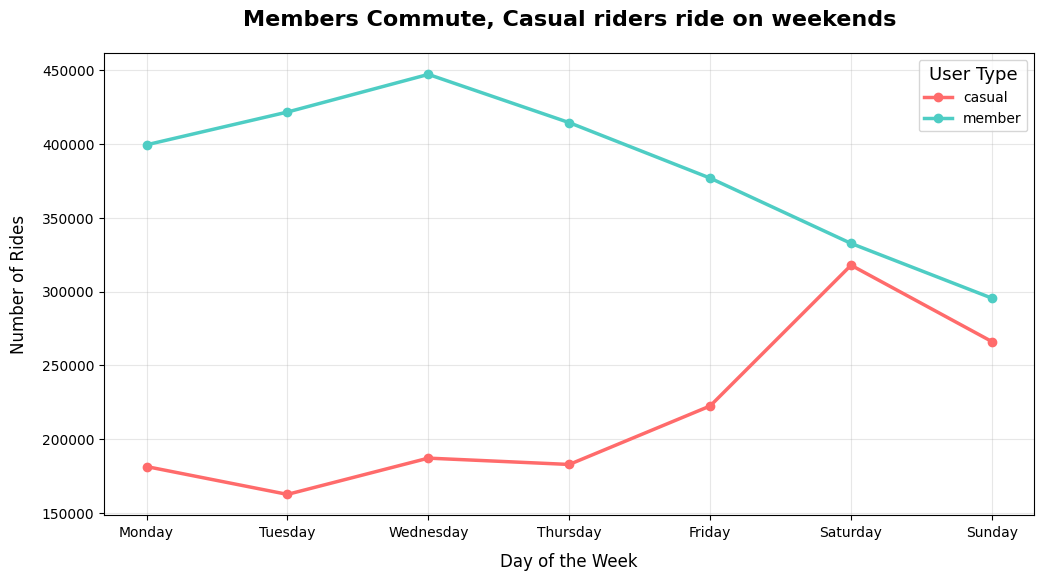

In [5]:

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rides_by_day_df['day_of_week'] = pd.Categorical(rides_by_day_df['day_of_week'], categories=day_order, ordered=True)
pivot_days = rides_by_day_df.pivot(index='day_of_week', columns='user_type', values='number_of_rides')

plt.figure(figsize=(12, 6))
pivot_days.plot(marker='o', linewidth=2.5, figsize=(12, 6))

plt.title('Members Commute, Casual riders ride on weekends', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Day of the Week', fontsize=12, labelpad=10)
plt.ylabel('Number of Rides', fontsize=12, labelpad=10)
plt.grid(True, alpha=0.3)
plt.legend(title='User Type', title_fontsize='13')
plt.savefig('../outputs/figures/rides_by_day.png', dpi=300, bbox_inches='tight')
plt.show()

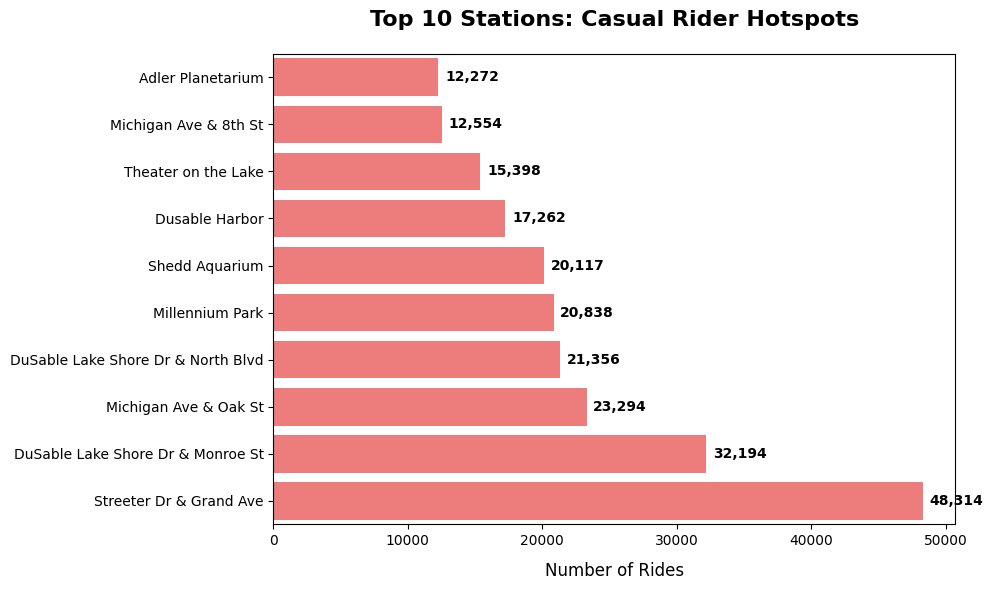

In [6]:
plt.figure(figsize=(10, 6))
data_for_plot = top_casual_stations_df.sort_values('number_of_casual_rides', ascending=True)

ax = sns.barplot(data=data_for_plot, y='start_station_name', x='number_of_casual_rides', color="#FF6B6B")

plt.title('Top 10 Stations: Casual Rider Hotspots', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Rides', fontsize=12, labelpad=10)
plt.ylabel('')

for i, v in enumerate(data_for_plot['number_of_casual_rides']):
    ax.text(v + 500, i, f'{v:,}', color='black', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/figures/top_casual_stations.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
full_data_for_tableau = pd.read_parquet('../data/clean/trips_clean.parquet')
full_data_for_tableau.dropna(inplace=True)
tableau_sample = full_data_for_tableau.sample(n=30000, random_state=1) # Sample 200k rows for performance
tableau_sample.to_csv('../outputs/tables/for_tableau_dashboard.csv', index=False)
print("Tableau data sample exported.")

Tableau data sample exported.
